<a href="https://colab.research.google.com/github/snehdeswal1105/ML_framingham_heart/blob/main/ml_4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Implement Gradient descent algorithm from scratch. Feel free to get code generated from chatGPT or any tool.
#Need to understand each and every line of code and the function they are performing.
import numpy as np

# 1. Define the hypothesis/prediction function
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# 2. Define the cost function (Mean Squared Error)
def compute_cost(y_pred, y_true):
    n = len(y_true)
    return (1/n) * np.sum((y_pred - y_true)**2)

# 3. Define the gradient descent function
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    n = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = predict(X, weights, bias)
        error = y_pred - y

        # Gradient of weights and bias
        dw = (2/n) * np.dot(X.T, error)
        db = (2/n) * np.sum(error)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Save the cost for analysis
        cost = compute_cost(y_pred, y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return weights, bias, cost_history


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
Iteration 0, Cost: 216.38013811246302
Iteration 100, Cost: 135.6554116424047
Iteration 200, Cost: 134.18425933080434
Iteration 300, Cost: 134.15162958516734
Iteration 400, Cost: 134.14985311656716
Iteration 500, Cost: 134.14937431629136
Iteration 600, Cost: 134.14915710950066
Iteration 700, Cost: 134.1490520039482
Iteration 800, Cost: 134.14900072878842
Iteration 900, Cost: 134.14897568596268
Mean Squared Error: 140.9008686114928
R² Score: 0.04085282274441293

Feature Coefficients:
age         -2.154838
sysBP       -0.135236
diaBP        0.023307
BMI         -0.663919
totChol      0.206977
glucose     -0.453146
heartRate    0.867994
dtype: float64

Top 5 Features Influencing cigsPerDay:
age          2.154838
heartRate    0.867994
BMI          0.663919
gluc

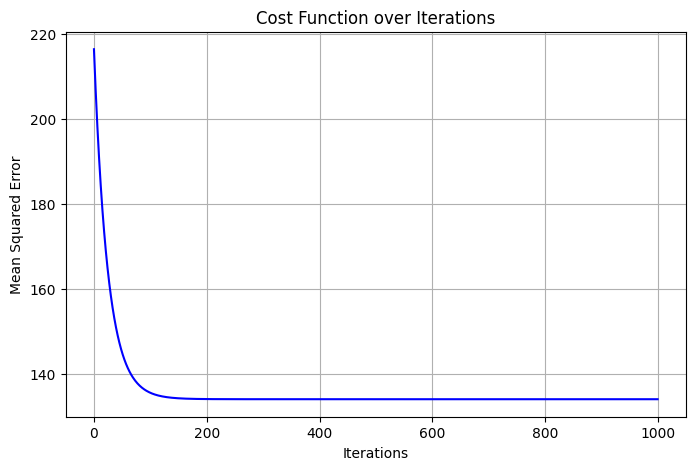

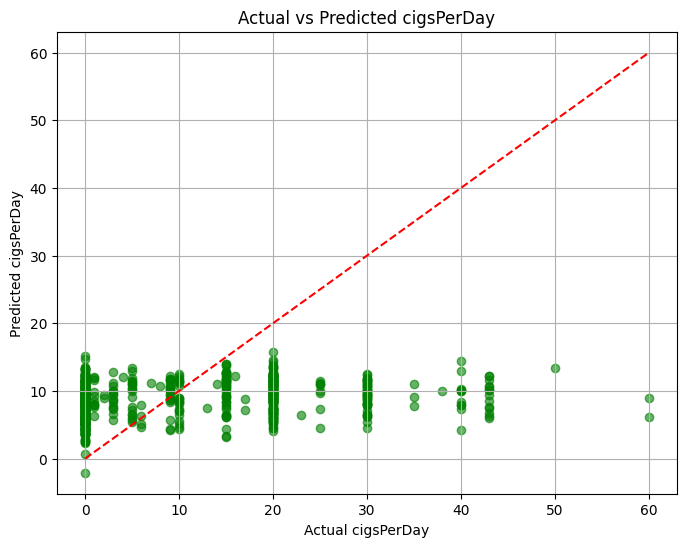

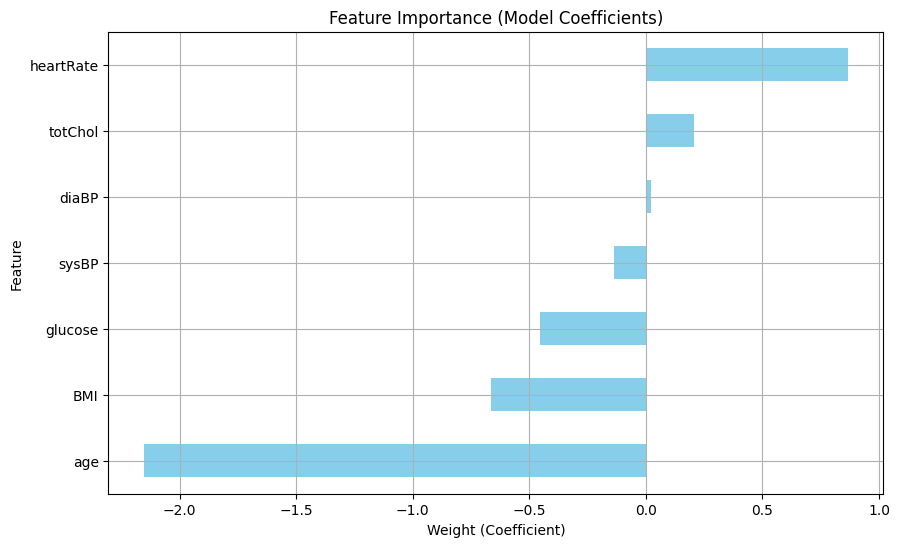

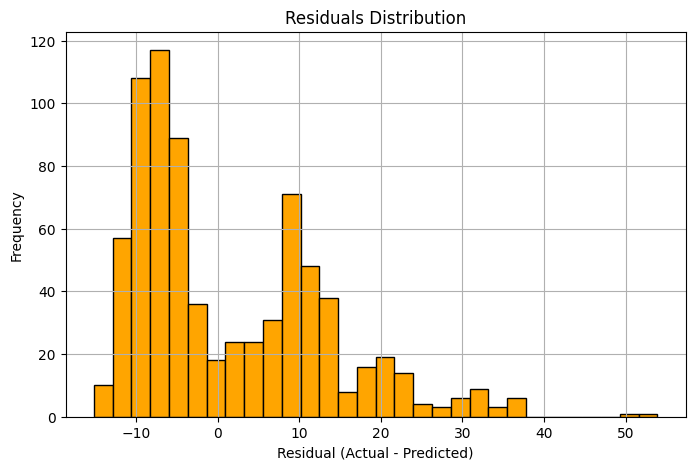

In [13]:
#Take the Framingham Heart disease dataset. Chose any numerical variable as target variable of interest to you. Build a regression based model upon the variable.
#Report the model performance and the model coefficients assosciated with each feature and report top 5 best performing features.

#Building a linear regression model to predict CIGPDAY (Cigarettes smoked per day) using other numerical features from the Framingham Heart Study dataset.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
df = pd.read_csv('/content/framingham (1).csv')
#print the actual column name in the dataframe to identify discrepancies
print(df.columns)

# Select numerical features excluding cigsPerDay (our target)
target = 'cigsPerDay'
features = ['age', 'sysBP', 'diaBP', 'BMI', 'totChol', 'glucose', 'heartRate']

# Drop missing values in selected columns
df = df[features + [target]].dropna()

# Split features and target
X = df[features].values
y = df[target].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Gradient Descent Implementation for Linear Regression
# Prediction function
def predict(X, weights, bias):
    return np.dot(X, weights) + bias
# Cost function: Mean Squared Error
def compute_cost(y_pred, y_true):
    n = len(y_true)
    return (1/n) * np.sum((y_pred - y_true)**2)

# Gradient Descent
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    n = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = predict(X, weights, bias)
        error = y_pred - y

        dw = (2/n) * np.dot(X.T, error)
        db = (2/n) * np.sum(error)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        cost = compute_cost(y_pred, y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return weights, bias, cost_history
#train the model
# Initialize parameters
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
iterations = 1000

# Run gradient descent
weights, bias, cost_history = gradient_descent(X_train, y_train, weights, bias, learning_rate, iterations)

#evaluate the model
# Make predictions
y_pred = predict(X_test, weights, bias)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

#analyse feature importance
# Create a Series for feature weights
feature_weights = pd.Series(weights, index=features)

print("\nFeature Coefficients:")
print(feature_weights)

# Top 5 features by absolute influence
top_features = feature_weights.abs().sort_values(ascending=False).head(5)
print("\nTop 5 Features Influencing cigsPerDay:")
print(top_features)

#cost function over ilteration (grid plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

#actual vs predicted plot(scattered plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted cigsPerDay')
plt.xlabel('Actual cigsPerDay')
plt.ylabel('Predicted cigsPerDay')
plt.grid(True)
plt.show()

#bar plot of coefficients
feature_weights_sorted = feature_weights.sort_values()

plt.figure(figsize=(10, 6))
feature_weights_sorted.plot(kind='barh', color='skyblue')
plt.title('Feature Importance (Model Coefficients)')
plt.xlabel('Weight (Coefficient)')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

#residual plot(predicts errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




